# Hand Writing Recognition with Deep Learning

Acknowledgements: Keras Team  
Github: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py  
Adapted by: Andrew Szwec

In [ ]:
# ! pip install --user tensorflow
# ! pip install --user keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

% matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load Hand Written Numbers

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# What does data look like?

In [4]:
x_train[0].shape

(28, 28)

In [5]:
y_train[0]

5

In [6]:
image = x_train[1].reshape(28, 28)

In [7]:
label = np.argmax(y_train[1])

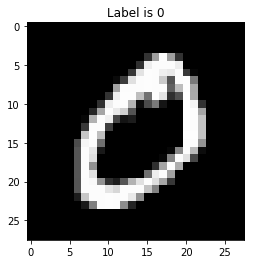

In [8]:
plt.title('Label is {label}'.format(label=label))
plt.imshow(image, cmap='gray')
plt.show()

# Print out a few examples

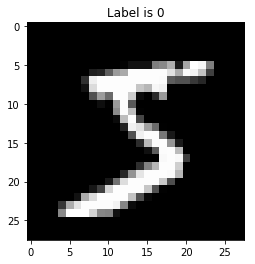

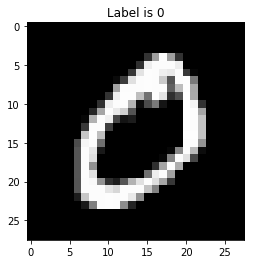

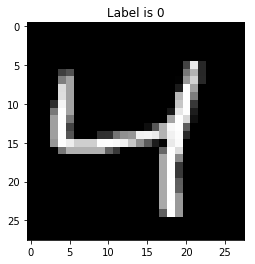

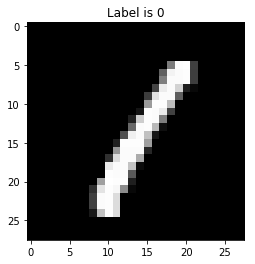

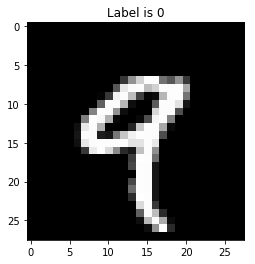

In [9]:
for img, y in zip(x_train[0:5], y_train[0:5]):
    image = img.reshape(28, 28)
    label = np.argmax(y)
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(image, cmap='gray')
    plt.show()

# Setup

In [10]:
batch_size = 256
num_classes = 10
epochs = 2 # 12 epoch for best results

# input image dimensions - need to know image size
img_rows, img_cols, channels = 28, 28, 1

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols)
    input_shape = (channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
    input_shape = (img_rows, img_cols, channels)

# Prepare Data and Normalise

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# This makes the data between 0 and 1 for performance reasons
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Setup the Model Graph

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train the Model

In [13]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 173s 3ms/step - loss: 0.3504 - acc: 0.8921 - val_loss: 0.0719 - val_acc: 0.9760
Epoch 2/2
60000/60000 [==============================] - 179s 3ms/step - loss: 0.1068 - acc: 0.9683 - val_loss: 0.0486 - val_acc: 0.9840


# Model Evaluation

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.048629975701868534
Test accuracy: 0.984
